In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('Siderophore_DB.csv')
df

,ID,Compounds,Microorganism,hydroxamate,catecholate,a-hydroxycarboxylate,carboxylate,phenolate,citrate,other,SMILES,validate smiles,SMARTS,SELFIES
0,1,"2,3-dihydroxybenzoic acid","Azobacter vinelandii, Azospirillum lipoferum, ...",0,1,0,1,0,0,0,OC(=O)c1c(O)c(O)ccc1,True,[#8]-[#6](=[#8])-[#6]1:[#6](-[#8]):[#6](-[#8])...,[O][C][=Branch1][C][=O][C][=C][Branch1][C][O][...
1,2,"2,3-dihydroxybenzoylglycine",Bacillus subtilis,0,1,0,1,0,0,0,c1ccc(O)c(O)c1C(=O)NCC(O)=O,True,[#6]1:[#6]:[#6]:[#6](-[#8]):[#6](-[#8]):[#6]:1...,[C][=C][C][=C][Branch1][C][O][C][Branch1][C][O...
2,3,"2,3-dihydroxybenzoylserine","Aerobacter aerogenes, Escherichia ST2, Escheri...",0,1,0,1,0,0,0,OC[C@@H](C(O)=O)NC(=O)c1c(O)c(O)ccc1,True,[#8]-[#6]-[#6@@H](-[#6](-[#8])=[#8])-[#7]-[#6]...,[O][C][C@@H1][Branch1][=Branch1][C][Branch1][C...
3,4,"2,3-dihydroxybenzoylthreonine",Klebsiella oxytoca,0,1,0,1,0,0,0,O[C@H](C)[C@@H](C(O)=O)NC(=O)c1cccc(O)c1O,True,[#8]-[#6@H](-[#6])-[#6@@H](-[#6](-[#8])=[#8])-...,[O][C@H1][Branch1][C][C][C@@H1][Branch1][=Bran...
4,5,2-hydroxybenzoic acid,"Azospirillum lipoferum, Burkholderia cepacia",0,0,0,1,1,0,0,OC(=O)c1c(O)cccc1,True,[#8]-[#6](=[#8])-[#6]1:[#6](-[#8]):[#6]:[#6]:[...,[O][C][=Branch1][C][=O][C][=C][Branch1][C][O][...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,277,Desferriastechrome,NaN,2,0,0,0,0,0,0,O=c1c(C)nc(OC)c(n1O)Cc2c[nH]c(c23)c(ccc3)CC=C(C)C,True,[#8]=[#6]1:[#6](-[#6]):[#7]:[#6](-[#8]-[#6]):[...,[O][=C][C][Branch1][C][C][=N][C][Branch1][Ring...
217,278,Fetroja,NaN,0,1,0,2,0,0,1,c1cc(O)c(O)c(Cl)c1C(=O)NCC[N+]2(CCCC2)CC(=C3C(...,True,[#6]1:[#6]:[#6](-[#8]):[#6](-[#8]):[#6](-[#17]...,[C][=C][C][Branch1][C][O][=C][Branch1][C][O][C...
218,279,Cefiderocol,NaN,0,1,0,2,0,0,1,c1cc(O)c(O)c(Cl)c1C(=O)NCC[N+]2(CCCC2)CC(=C3C(...,True,[#6]1:[#6]:[#6](-[#8]):[#6](-[#8]):[#6](-[#17]...,[C][=C][C][Branch1][C][O][=C][Branch1][C][O][C...
219,280,Cefiderocol metabolite M12,NaN,0,0,0,2,0,0,1,c1cc(O)c(OC)c(Cl)c1C(=O)NCC[N+]2(CCCC2)CC(=C3C...,True,[#6]1:[#6]:[#6](-[#8]):[#6](-[#8]-[#6]):[#6](-...,[C][=C][C][Branch1][C][O][=C][Branch1][Ring1][...


In [3]:
df=df.iloc[:, [3,4,5,6,7,8,9]]
df
#Solo conservamos las últimas columnas, estos son los targets para nuestro modelo de clasificacion

,hydroxamate,catecholate,a-hydroxycarboxylate,carboxylate,phenolate,citrate,other
0,0,1,0,1,0,0,0
1,0,1,0,1,0,0,0
2,0,1,0,1,0,0,0
3,0,1,0,1,0,0,0
4,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...
216,2,0,0,0,0,0,0
217,0,1,0,2,0,0,1
218,0,1,0,2,0,0,1
219,0,0,0,2,0,0,1


Targets
|

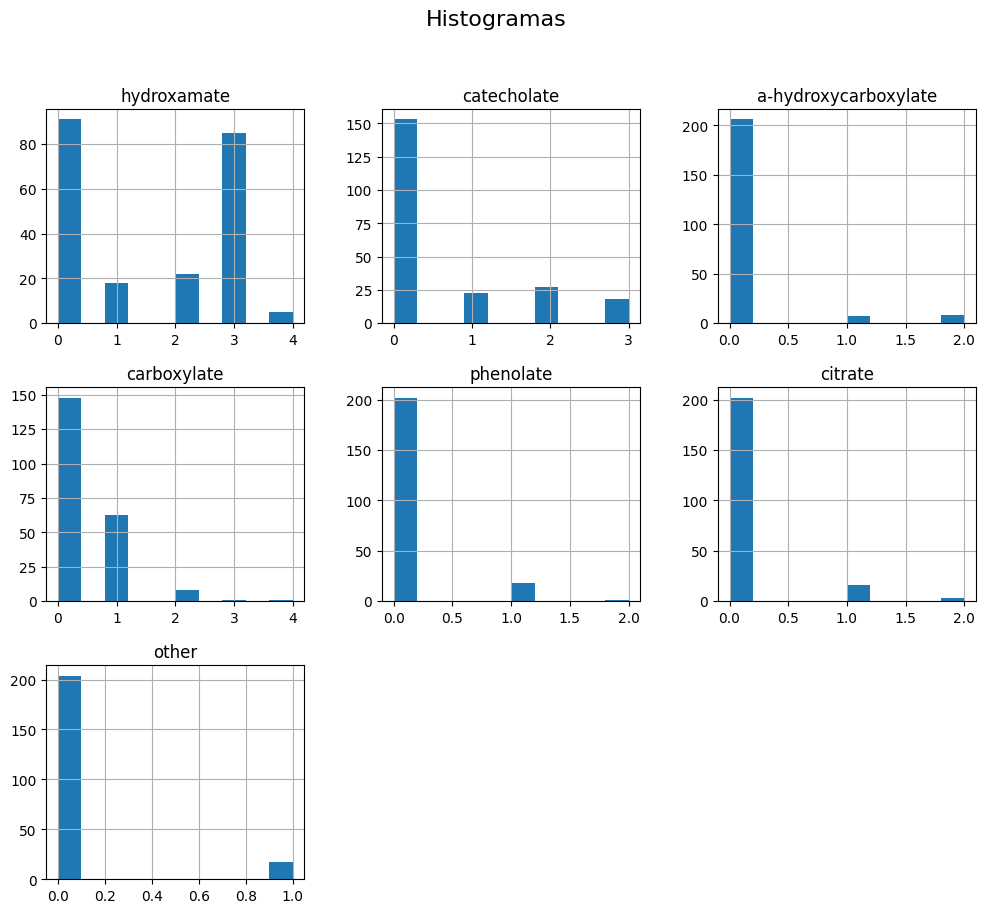

In [4]:
#gráfico de barras para analizar targets
df.hist(figsize=(12, 10))
plt.suptitle('Histogramas', fontsize=16)
plt.show()

Se podría usar hydroxamate, catecholate,carbolylate ya que tienen datos suficientes para una clasificacion, el cual se hallará en estos casos:

In [5]:
df2 = pd.read_csv('Siderophore_DB1.csv')
df2


,ID,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_amide,fr_benzene,fr_ester,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond
0,1,11.191262,-1.343472,11.191262,0.665370,0.522491,154.121,148.073,154.026609,58,...,0,0,0,0,0,1,0,1,2,1
1,2,12.228676,-3.436129,12.228676,0.586755,0.522624,211.173,202.101,211.048072,80,...,0,1,0,0,1,1,0,1,2,2
2,3,12.627825,-3.816337,12.627825,0.758838,0.442264,241.199,230.111,241.058637,92,...,0,1,0,0,1,1,0,1,2,2
3,4,12.854441,-4.102795,12.854441,0.884463,0.468346,255.226,242.122,255.074287,98,...,0,1,0,0,1,1,0,1,2,2
4,5,11.108779,-1.310880,11.108779,0.630759,0.610259,138.122,132.074,138.031694,52,...,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,277,13.053345,-3.721588,13.053345,0.123679,0.544261,353.422,330.238,353.173942,136,...,2,1,0,0,0,1,0,1,0,0
217,278,14.672799,-5.563063,14.672799,0.044514,0.049920,753.236,717.956,752.156986,268,...,4,2,1,0,3,1,0,0,2,2
218,279,14.672799,-5.563063,14.672799,0.044514,0.049920,753.236,717.956,752.156986,268,...,4,2,1,0,3,1,0,0,2,2
219,280,14.708209,-5.629267,14.708209,0.054724,0.069150,767.263,729.967,766.172636,274,...,4,2,1,0,3,1,0,0,1,1


Eliminamos las variables que tengan un factor de correlación mayor a 0.8, para reducir las variables, quedandonos con 32 variables


In [6]:
df2.info()

columnas_numericas = df2.select_dtypes(include=['int', 'float'])

# Eliminar las columnas que no contienen valores numéricos
df2 = df2[columnas_numericas.columns]

# Matriz de correlación
matriz_correlacion = df2.corr().abs()

# Crear una máscara para seleccionar la mitad superior de la matriz de correlación
mask = matriz_correlacion.mask(np.tril(np.ones(matriz_correlacion.shape)).astype(bool))

# Encontrar las columnas altamente correlacionadas
columnas_a_eliminar = [columna for columna in mask.columns if any(mask[columna] > 0.8)]

# Eliminar las columnas altamente correlacionadas
df_sin_correlacion = df2.drop(columnas_a_eliminar, axis=1)

df_sin_correlacion

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Columns: 119 entries, ID to fr_phenol_noOrthoHbond
dtypes: float64(86), int64(32), object(1)
memory usage: 205.6+ KB


,MaxEStateIndex,MinAbsEStateIndex,qed,MaxPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGLO,BCUT2D_MRHI,BCUT2D_MRLOW,...,SlogP_VSA8,EState_VSA11,VSA_EState3,VSA_EState4,NumAliphaticHeterocycles,MolLogP,fr_Al_COO,fr_Al_OH,fr_NH0,fr_ester
0,11.191262,0.665370,0.522491,0.339119,1.272727,12.704327,-0.091325,-2.193373,2.220027,-0.763758,...,1.431200,0.0,11.608163,-0.709954,0,0.79600,0,0,0,0
1,12.228676,0.586755,0.522624,0.322481,1.400000,12.609118,-0.165337,-2.345383,1.810794,-0.798781,...,1.431200,0.0,10.819702,-1.051013,0,-0.08780,1,0,0,0
2,12.627825,0.758838,0.442264,0.328131,1.352941,11.812415,-0.166358,-2.471117,1.314088,-0.992936,...,1.431200,0.0,14.306422,-1.205152,0,-0.72690,1,1,0,0
3,12.854441,0.884463,0.468346,0.328426,1.333333,11.309400,-0.244568,-2.549090,1.281519,-1.061997,...,1.431200,0.0,14.345548,-1.305067,0,-0.33840,1,1,0,0
4,11.108779,0.630759,0.610259,0.338969,1.400000,11.839697,-0.092697,-2.183187,2.175367,-0.749956,...,1.431200,0.0,7.580036,-0.670370,0,1.09040,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,13.053345,0.123679,0.544261,0.327527,1.346154,10.480402,-0.246753,-2.421381,1.473667,-0.986620,...,10.902925,0.0,3.048580,-10.314657,0,3.37842,0,0,2,0
217,14.672799,0.044514,0.049920,0.352359,1.180000,11.853578,-0.244322,-2.766024,1.757334,-1.395657,...,2.862399,0.0,8.485129,-19.591276,3,1.15300,2,0,4,0
218,14.672799,0.044514,0.049920,0.352359,1.180000,11.853578,-0.244322,-2.766024,1.757334,-1.395657,...,2.862399,0.0,8.485129,-19.591276,3,1.15300,2,0,4,0
219,14.708209,0.054724,0.069150,0.352359,1.196078,11.753217,-0.246384,-2.766024,1.677211,-1.395660,...,2.862399,0.0,4.076489,-19.866191,3,1.45600,2,0,4,0


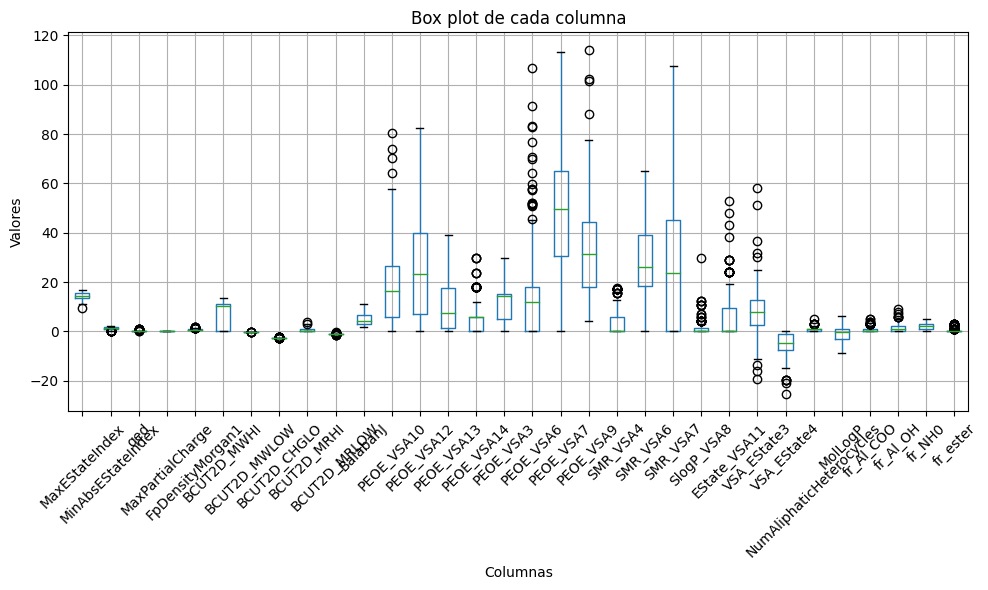

In [7]:
plt.figure(figsize=(10, 6))
df_sin_correlacion.boxplot()
plt.xticks(rotation=45)
plt.title('Box plot de cada columna')
plt.xlabel('Columnas')
plt.ylabel('Valores')
plt.tight_layout()
plt.show()



In [8]:
df_sin_correlacion.info()
#No hay datos faltantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MaxEStateIndex            221 non-null    float64
 1   MinAbsEStateIndex         221 non-null    float64
 2   qed                       221 non-null    float64
 3   MaxPartialCharge          221 non-null    float64
 4   FpDensityMorgan1          221 non-null    float64
 5   BCUT2D_MWHI               221 non-null    float64
 6   BCUT2D_MWLOW              221 non-null    float64
 7   BCUT2D_CHGLO              221 non-null    float64
 8   BCUT2D_MRHI               221 non-null    float64
 9   BCUT2D_MRLOW              221 non-null    float64
 10  BalabanJ                  221 non-null    float64
 11  PEOE_VSA10                221 non-null    float64
 12  PEOE_VSA12                221 non-null    float64
 13  PEOE_VSA13                221 non-null    float64
 14  PEOE_VSA14

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df_sin_correlacion
y_target1 = df['hydroxamate']  # Target 1
y_target2 = df['catecholate']  # Target 2
y_target3 = df['carboxylate']  # Target 3

X_train, X_test, y_train_target1, y_test_target1 = train_test_split(X, y_target1, test_size=0.2, random_state=42)
X_train, X_test, y_train_target2, y_test_target2 = train_test_split(X, y_target2, test_size=0.2, random_state=42)
X_train, X_test, y_train_target3, y_test_target3 = train_test_split(X, y_target3, test_size=0.2, random_state=42)


def train_and_evaluate_svm(X_train, y_train, X_test, y_test):
    # Escalar características
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    svm_classifier = SVC(kernel='rbf', decision_function_shape='ovr', random_state=42)

    svm_classifier.fit(X_train_scaled, y_train)

    y_pred = svm_classifier.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)

    class_report = classification_report(y_test, y_pred)

    resultados = {
        'accuracy': accuracy,
        'classification_report': class_report
    }

    return resultados

# Ejemplo de uso:
# Supongamos que tienes X_train_scaled, y_train_target1, X_test_scaled, y_test_target1 para el target1
# Puedes llamar a la función train_and_evaluate_svm de la siguiente manera:

# Entrenar y evaluar el modelo para cada target
print('\nHydroxamate:')
resultados_target1 = train_and_evaluate_svm(X_train_scaled, y_train_target1, X_test_scaled, y_test_target1)
print(f'Precisión del modelo: {resultados_target1["accuracy"]:.4f}')
print('Informe de Clasificación:')
print(resultados_target1['classification_report'])

print('\nCatecholate:')
resultados_target2 = train_and_evaluate_svm(X_train_scaled, y_train_target2, X_test_scaled, y_test_target2)
print(f'Precisión del modelo: {resultados_target2["accuracy"]:.4f}')
print('Informe de Clasificación:')
print(resultados_target2['classification_report'])

print('\nCarboxylate:')
resultados_target3 = train_and_evaluate_svm(X_train_scaled, y_train_target3, X_test_scaled, y_test_target3)
print(f'Precisión del modelo: {resultados_target3["accuracy"]:.4f}')
print('Informe de Clasificación:')
print(resultados_target3['classification_report'])



Hydroxamate:
Precisión del modelo: 0.8000
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       1.00      0.33      0.50         6
           2       0.67      0.50      0.57         4
           3       0.75      1.00      0.86        18
           4       0.00      0.00      0.00         3

    accuracy                           0.80        45
   macro avg       0.66      0.57      0.57        45
weighted avg       0.76      0.80      0.75        45


Catecholate:
Precisión del modelo: 0.8889
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        33
           1       0.33      0.50      0.40         2
           2       0.67      1.00      0.80         4
           3       1.00      0.67      0.80         6

    accuracy                           0.89        45
   macro avg       0.74      0.78      0.74    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Los modelos de SVM han demostrado ser efectivos para la clasificación de los tres targets (Hydroxamate, Catecholate y Carboxylate), con precisión generalmente alta (alrededor del 88.9%).
Se obtuvieron mejores resultados comparado con los métodos del challenge 2
Sería importante considerar estrategias adicionales, como el ajuste de hiperparámetros o el uso de técnicas de balanceo de clases, para mejorar el rendimiento del modelo